# **Vehicle Insurance Prediction Dataset**

## **EDA**

In [2]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams['figure.figsize'] = [6, 3]

In [3]:
# reading dataset
df = pd.read_csv('data.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
# shape of dataset
df.shape

(381109, 12)

In [6]:
# checking for null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
# checking for duplicated values
duplicate_values = df.duplicated().sum()
duplicate_values

np.int64(0)

In [8]:
# all columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [9]:
# seperating categorical and numerical columns

categorical_columns = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
                       'Vehicle_Damage', 'Policy_Sales_Channel','Response']

numerical_columns = ['Age', 'Annual_Premium', 'Vintage']

In [10]:
# statistical discription of dataset
df[numerical_columns].describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


### **Univariate analysis**

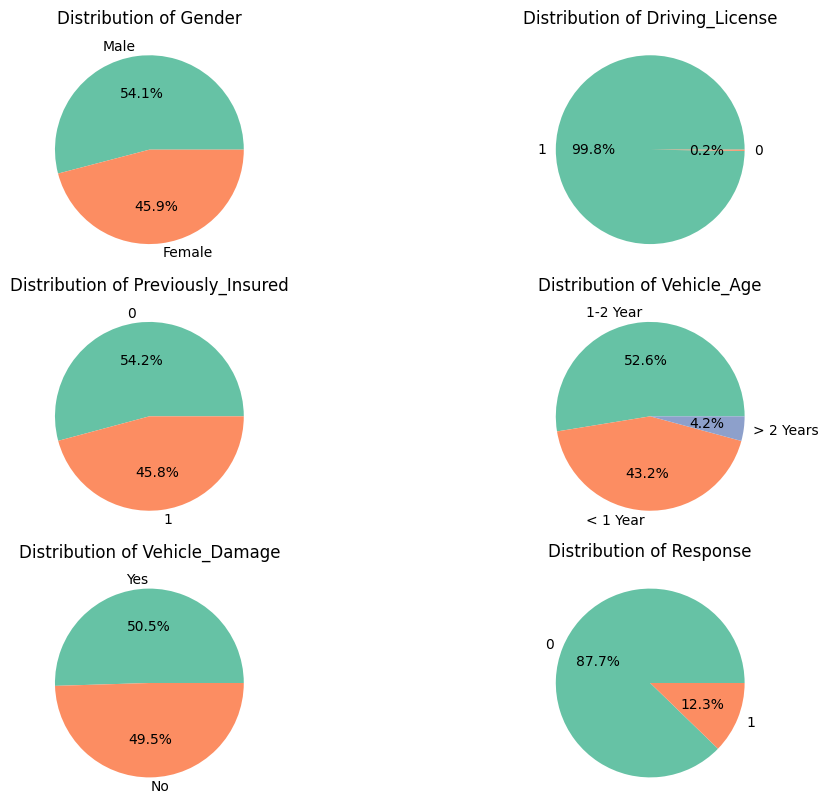

In [11]:
# univariate analysis on categorical columns

columns_to_plot = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
                   'Vehicle_Damage', 'Response']

# Number of rows and columns
n_rows = 3
n_cols = 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 8), constrained_layout=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(columns_to_plot):
    counts = df[col].value_counts()
    labels = counts.index
    values = counts.values
    
    axes[i].pie(values, labels=labels, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
    axes[i].set_title(f'Distribution of {col}')

# Hide unused subplots
for j in range(len(columns_to_plot), len(axes)):
    axes[j].set_visible(False)

# Show the plots
plt.show()


From above analysis it is clear that there is no meaning of putting Driving License column in our dataset

In [ ]:
# Univariate analysis on Region_Code and Policy_Sales_Channel

region_counts = df['Region_Code'].nunique()
print(f'There are {region_counts} unique regions')

# Policy_Sales_Channel

print(f"There are {df['Policy_Sales_Channel'].nunique()} unique values in Policy Sales Channel")

There are 53 unique regions
There are 155 unique values in Policy Sales Channel


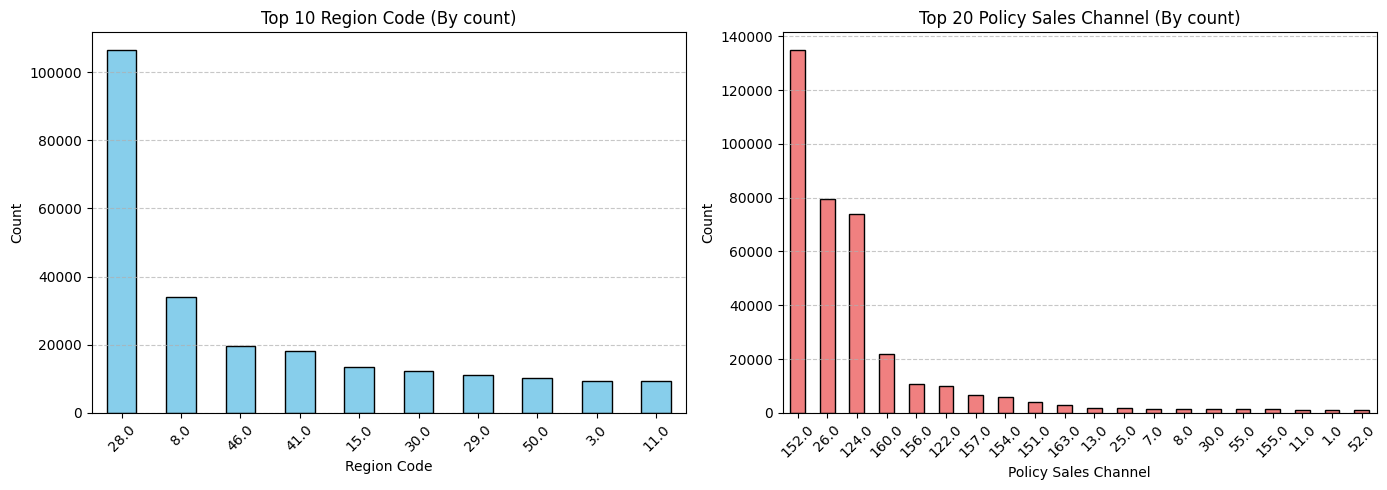

In [28]:
# Region_Code and Policy_Sales_Channel
region_counts = df['Region_Code'].value_counts().head(10)
policy_channel_counts = df['Policy_Sales_Channel'].value_counts().head(20)

# Create subplots for side-by-side plotting
plt.figure(figsize=(14, 5))

# Plot for Top 10 Region Codes
plt.subplot(1, 2, 1)
region_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Region Code (By count)')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Top 20 Policy Sales Channels
plt.subplot(1, 2, 2)
policy_channel_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 20 Policy Sales Channel (By count)')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


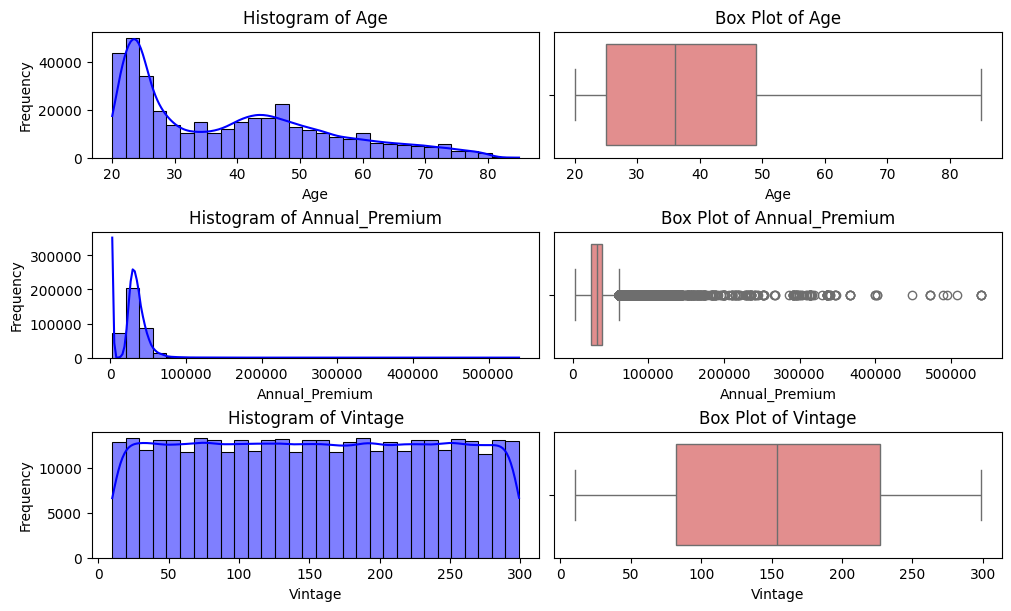

In [33]:
# Create a grid of 3 rows and 2 columns
n_rows = len(numerical_columns)
n_cols = 2

# Set figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6), constrained_layout=True)

# Iterate over numerical columns to plot
for i, col in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 0], color='blue', edgecolor='black')
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(data=df, x=col, ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'Box Plot of {col}')
    axes[i, 1].set_xlabel(col)

# Display the plots
plt.show()

There are lots of outliers in Annual Premium column

### **Bivariate Analysis**

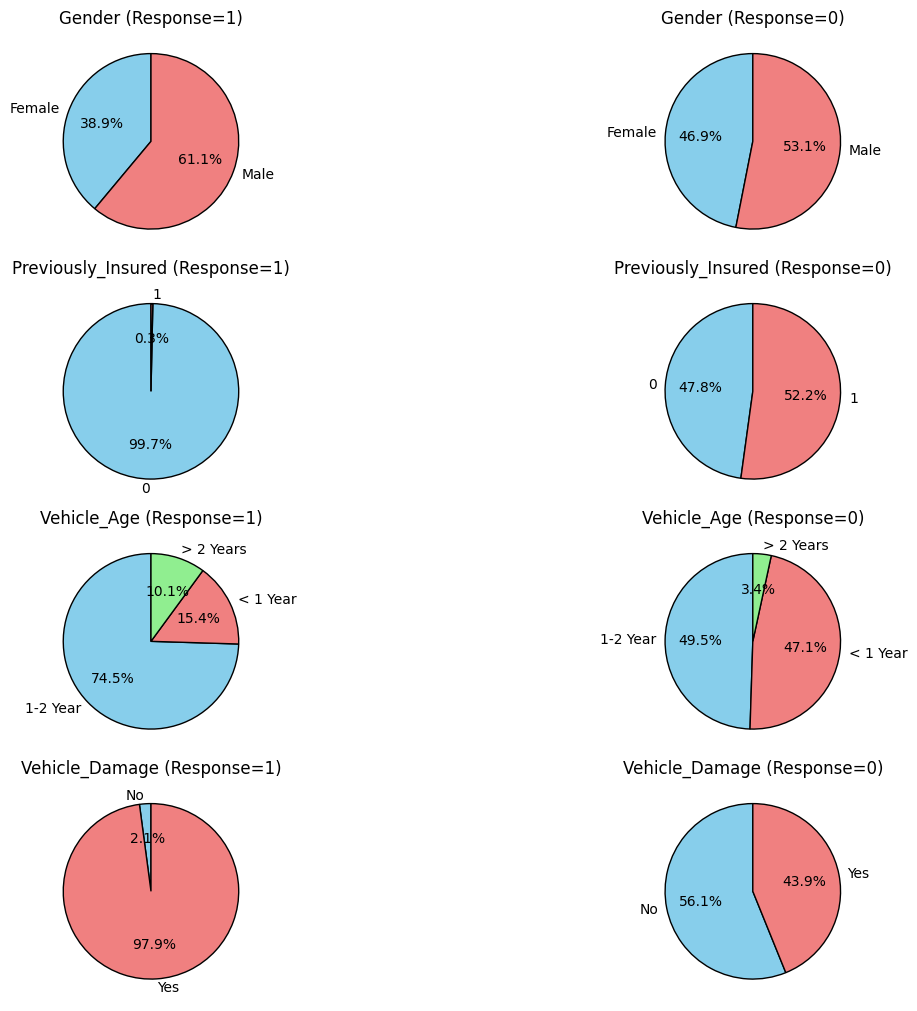

In [73]:
# Columns to analyze
columns_to_plot = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

# Create subplots: 4 rows, 2 columns (one column for Response=1, another for Response=0)
n_rows, n_cols = len(columns_to_plot), 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10), constrained_layout=True)

# Iterate over the columns to plot
for i, col in enumerate(columns_to_plot):
    # Calculate counts for each combination of the column and Response
    data = df.groupby(['Response', col]).size().unstack(fill_value=0)
    
    # Calculate percentages
    data_percent = data.div(data.sum(axis=1), axis=0) * 100
    
    # Plot pie chart for Response=1
    labels = data.columns  # Categories in the column
    colors = ['skyblue', 'lightcoral', 'lightgreen']
    sizes_1 = data_percent.loc[1] if 1 in data_percent.index else [0] * len(labels)  # Ensure it handles missing Response=1
    axes[i, 0].pie(
        sizes_1,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(labels)],
        wedgeprops={'edgecolor': 'black'}
    )
    axes[i, 0].set_title(f'{col} (Response=1)')
    
    # Plot pie chart for Response=0
    sizes_0 = data_percent.loc[0] if 0 in data_percent.index else [0] * len(labels)  # Ensure it handles missing Response=0
    axes[i, 1].pie(
        sizes_0,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(labels)],
        wedgeprops={'edgecolor': 'black'}
    )
    axes[i, 1].set_title(f'{col} (Response=0)')

# Adjust layout and show plots
plt.show()


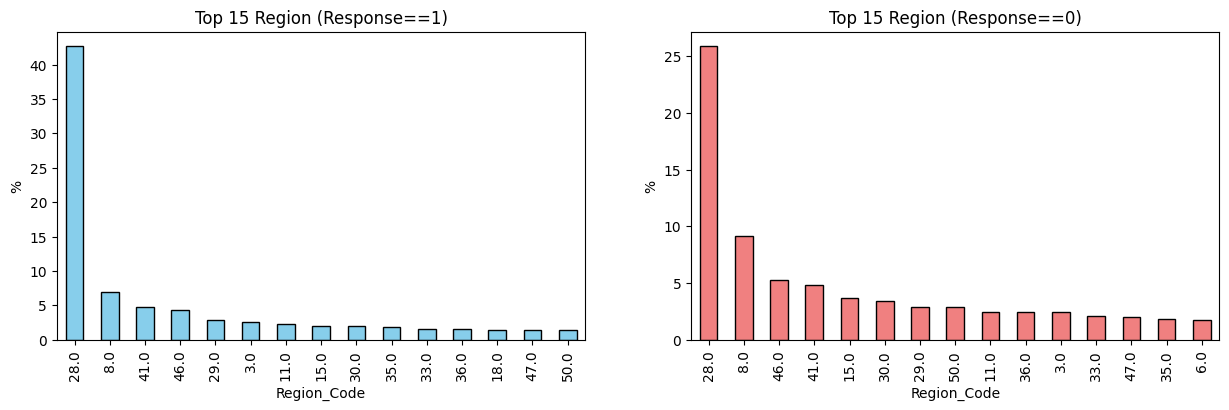

In [101]:
# bivariate analysis of region code vs response

region_code_accepted = (((df[df['Response']==1]['Region_Code'].value_counts())/df[df['Response']==1].shape[0])*100).head(15)
region_code_rejected = (((df[df['Response']==0]['Region_Code'].value_counts())/df[df['Response']==0].shape[0])*100).head(15)
plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
region_code_accepted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('%')
plt.title('Top 15 Region (Response==1)')

plt.subplot(1,2,2)
region_code_rejected.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.ylabel('%')
plt.title('Top 15 Region (Response==0)')

plt.show()

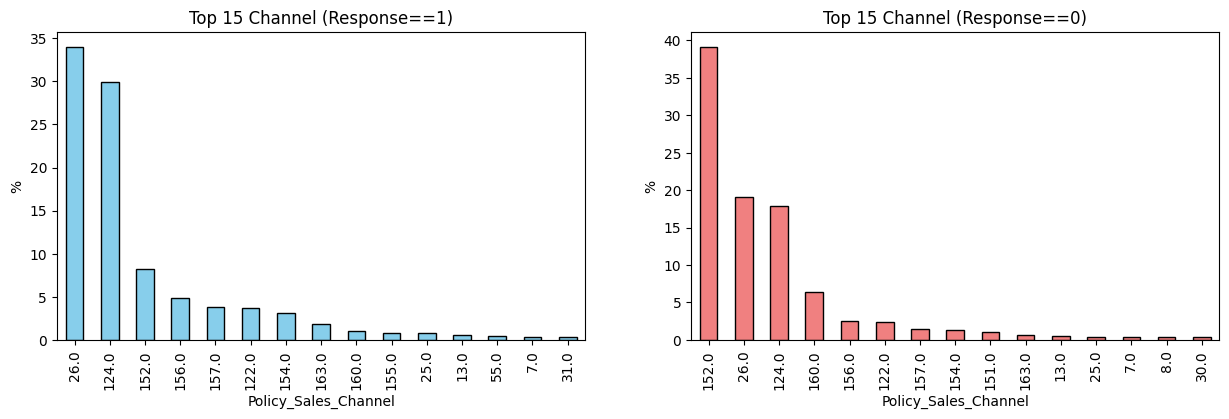

In [102]:
# bivariate analysis of policy sales channel vs response

policy_channel_accepted = (((df[df['Response']==1]['Policy_Sales_Channel'].value_counts())/df[df['Response']==1].shape[0])*100).head(15)
policy_channel_rejected = (((df[df['Response']==0]['Policy_Sales_Channel'].value_counts())/df[df['Response']==0].shape[0])*100).head(15)
plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
policy_channel_accepted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('%')
plt.title('Top 15 Channel (Response==1)')

plt.subplot(1,2,2)
policy_channel_rejected.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.ylabel('%')
plt.title('Top 15 Channel (Response==0)')

plt.show()

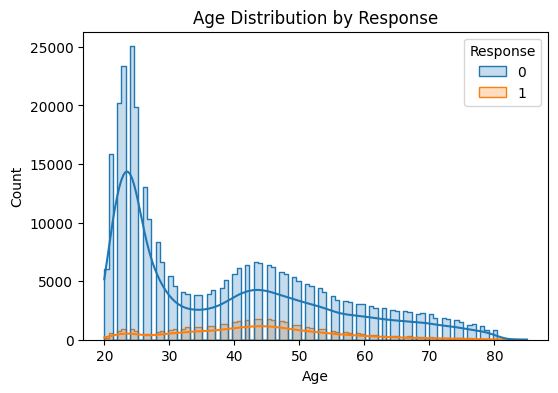

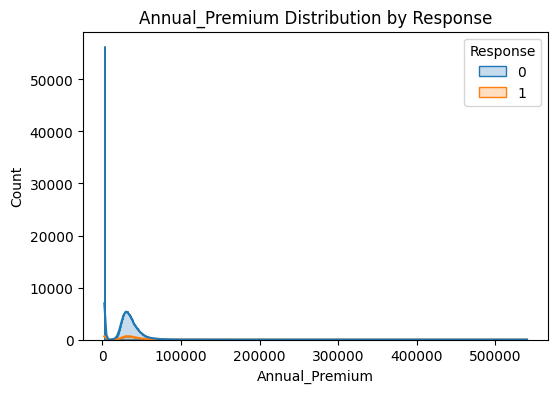

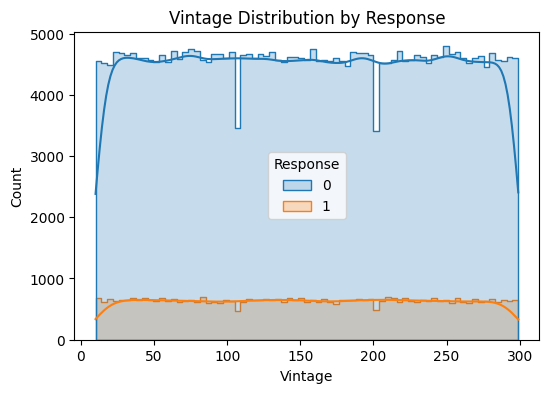

In [115]:
# bivariate analysis on age column
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Response', kde=True, element='step')
    plt.title(f'{col} Distribution by Response')
    plt.show()

In [116]:
#statastics
for col in numerical_columns:
    stats = df.groupby('Response')[col].describe()
    print(f'Statistics for {col} by Response:\n', stats, '\n')

Statistics for Age by Response:
              count       mean        std   min   25%   50%   75%   max
Response                                                              
0         334399.0  38.178227  15.816052  20.0  24.0  34.0  49.0  85.0
1          46710.0  43.435560  12.168924  20.0  35.0  43.0  51.0  83.0 

Statistics for Annual_Premium by Response:
              count          mean           std     min      25%      50%  \
Response                                                                   
0         334399.0  30419.160276  16998.293197  2630.0  24351.0  31504.0   
1          46710.0  31604.092742  18646.508040  2630.0  24868.0  33002.0   

              75%       max  
Response                     
0         39120.0  540165.0  
1         41297.0  540165.0   

Statistics for Vintage by Response:
              count        mean        std   min   25%    50%    75%    max
Response                                                                  
0         334399.0  154

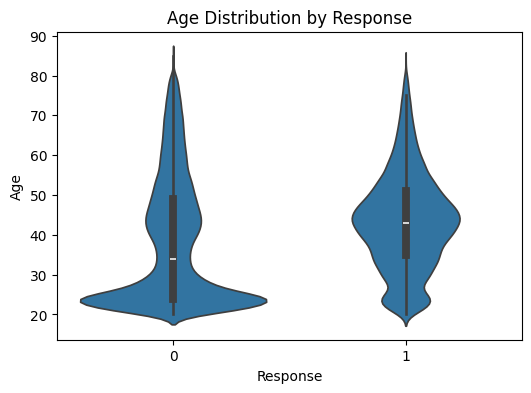

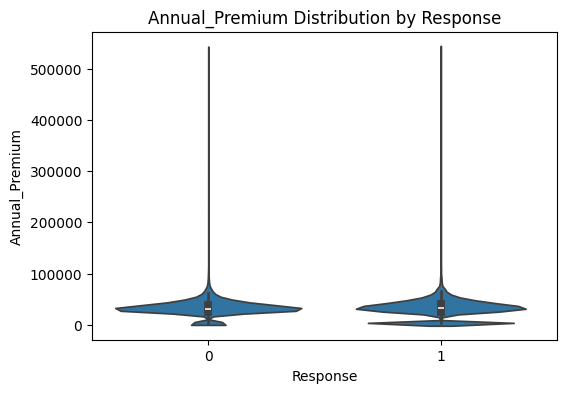

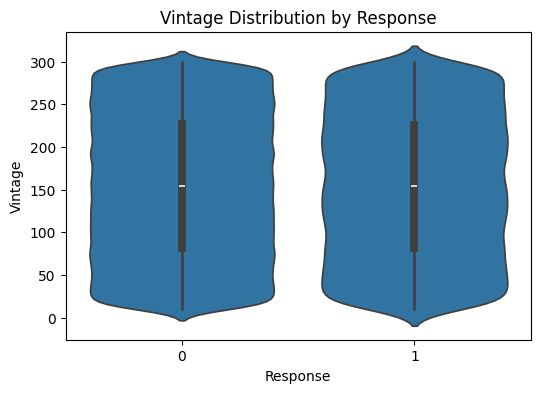

In [119]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.violinplot(data=df, x='Response', y=col)
    plt.title(f'{col} Distribution by Response')
    plt.show()

### **Multivariate Analysis**

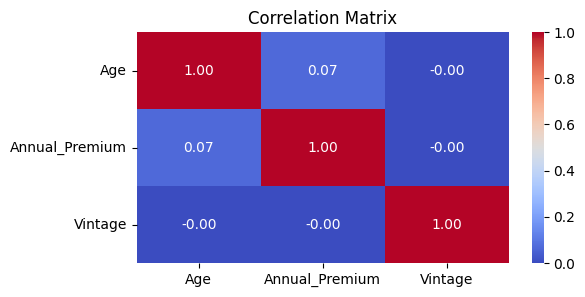

In [120]:
# correlation matrix
corr_matrix = df[['Age', 'Annual_Premium', 'Vintage']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

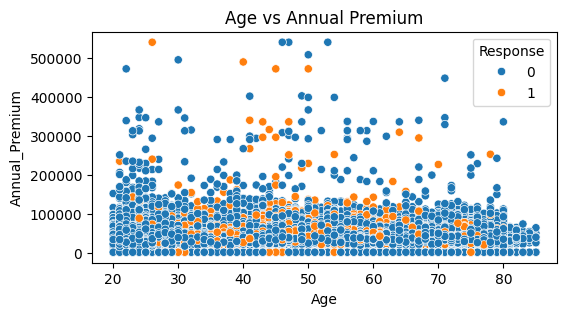

In [ ]:
# scatter plot Age vs Annual Premium
sns.scatterplot(data=df, x='Age', y='Annual_Premium', hue='Response')
plt.title('Age vs Annual Premium')
plt.show()


c:\Users\masan\OneDrive\Desktop\MLOps\first_project\InsurePredict-Customer-Conversion-Insights\vehicle_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


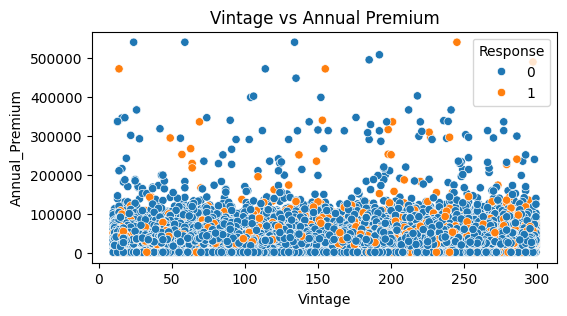

In [ ]:
# scatter plot Vintage vs Annual Premium
sns.scatterplot(data=df, x='Vintage', y='Annual_Premium', hue='Response')
plt.title('Vintage vs Annual Premium')
plt.show()


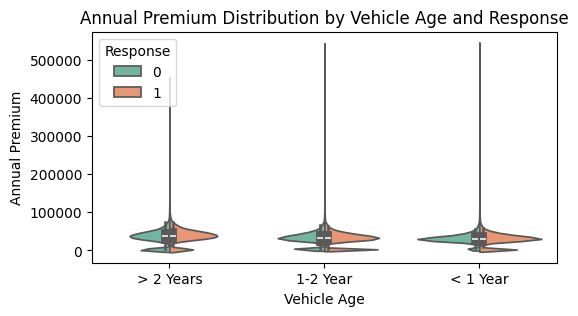

In [ ]:
# Violin plot for Annual Premium Distribution, Vehicle Age and Response
sns.violinplot(data=df, x='Vehicle_Age', y='Annual_Premium', hue='Response', split=True, palette='Set2')
plt.title('Annual Premium Distribution by Vehicle Age and Response')
plt.xlabel('Vehicle Age')
plt.ylabel('Annual Premium')
plt.show()
